# Austin Crime Project 

___

By: Alejandro Garcia, Matthew Luna, Kristofer Rivera, Oliver Ton
<br>
Date: June 2022

___

## Project Goals



___

## Project Description



___

## Importing the Required Modules

Everything we need to run the code blocks in this notebook are located in the top level directory. To run the code blocks in this report you will need numpy, pandas, matplotlib, seaborn, and sklearn installed on your computer.

___

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from acquire import *
from prepare import *
from explore import *

#Settting matplotlib/seaborn defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

## Data Acquisition and Preparation

**Steps Taken:**

- The data set was gathered from publicly available data provided by the Austin Police 
Department on data.austintexas.gov.
- We created a function to automate gathering the data from the provided API and caching it 
locally as a CSV file. 
- Our initial data set included 500,000 rows and 31 columns. 
- For ease of use and relevancy, we decided to limit our data to crimes reported between the 
years 2018 and 2021. 
- After removing data outside this time frame, we were left with 401,955 rows.
- Download the shapefile for boundaries zipcode tabulation areas at this [website](https://data.austintexas.gov/dataset/Boundaries-Zip-Code-Tabulation-Areas-2017/nf4y-c7ue)
- Merge the dataframes and then create a new csv file


**Below is what our data set looked like after acquisition and before cleaning.**

In [2]:
df = get_crime_data(use_cache=True)
df.head()

Using cached csv


,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,y_coordinate,latitude,longitude,location,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,:@computed_region_q9nd_rr82,:@computed_region_qwte_z96m,clearance_status,clearance_date
0,20221411560,AGG ASSAULT,402,N,2022-05-21T23:28:00.000,2022-05-21T00:00:00.000,2328,2022-05-21T23:28:00.000,2022-05-21T00:00:00.000,2328,...,3130738.0,30.278679,-97.690473,"{'latitude': '30.27867944', 'longitude': '-97....",2864.0,1.0,8.0,NaN,NaN,NaN
1,20221411686,FAMILY DISTURBANCE,3400,N,2022-05-21T23:25:00.000,2022-05-21T00:00:00.000,2325,2022-05-21T23:25:00.000,2022-05-21T00:00:00.000,2325,...,3135376.0,30.379194,-97.673005,"{'latitude': '30.37919393', 'longitude': '-97....",3642.0,1.0,8.0,NaN,NaN,NaN
2,20221411618,DATING DISTURBANCE,2400,N,2022-05-21T23:17:00.000,2022-05-21T00:00:00.000,2317,2022-05-21T23:17:00.000,2022-05-21T00:00:00.000,2317,...,3107646.0,30.264380,-97.764029,"{'latitude': '30.26438022', 'longitude': '-97....",2859.0,5.0,1.0,1426.0,NaN,NaN
3,20221411720,PUBLIC INTOXICATION,2300,N,2022-05-21T23:07:00.000,2022-05-21T00:00:00.000,2307,2022-05-21T23:07:00.000,2022-05-21T00:00:00.000,2307,...,3112676.0,30.274588,-97.747819,"{'latitude': '30.27458791', 'longitude': '-97....",2856.0,9.0,10.0,NaN,C,2022-05-22T00:00:00.000
4,20221410653,CIVIL DISTURBANCE/DEMO,3402,N,2022-05-21T23:04:00.000,2022-05-21T00:00:00.000,2304,2022-05-21T23:04:00.000,2022-05-21T00:00:00.000,2304,...,3120273.0,30.234682,-97.724824,"{'latitude': '30.23468195', 'longitude': '-97....",3256.0,3.0,3.0,102.0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_report_number       500000 non-null  int64  
 1   crime_type                   500000 non-null  object 
 2   ucr_code                     500000 non-null  int64  
 3   family_violence              500000 non-null  object 
 4   occ_date_time                500000 non-null  object 
 5   occ_date                     500000 non-null  object 
 6   occ_time                     500000 non-null  int64  
 7   rep_date_time                500000 non-null  object 
 8   rep_date                     500000 non-null  object 
 9   rep_time                     500000 non-null  int64  
 10  location_type                498329 non-null  object 
 11  address                      500000 non-null  object 
 12  zip_code                     497123 non-null  float64
 13 

### Cleaning/Preparation Steps
- After investigating columns with missing values, we decided to drop 15 columns entirely that we deemed to be unuseful or redundant. 
- Next, we made decisions on how to handle the missing values in our remaining 16 columns. 
- For 7 columns, including clearance_status, clearance_date, zip_code, sector, district, latitude, and longitude, we decided that we could not reasonably impute nulls with a value and dropped all missing rows. 
- We had 753 missing values for location_type values which we decided to add to the Other / Unknown value. 
- We had 1438 missing values for council_district which we decided to impute as the most common district. 

**Below is what our data set looked like after cleaning and preparation steps.**

In [4]:
df = prep_data(df)
df.head()

,crime_type,family_violence,occurrence_time,occurrence_date,report_time,report_date,location_type,address,zip_code,council_district,sector,district,latitude,longitude,clearance_status,clearance_date,cleared
32704,PUBLIC INTOXICATION,N,2021-12-31 23:50:00,2021-12-31,2021-12-31 23:50:00,2021-12-31,HWY / ROAD / ALLEY/ STREET/ SIDEWALK,406 E 6TH ST,78701.0,9.0,GE,2,30.267300,-97.738857,cleared by arrest,2021-12-31,True
32705,THEFT,N,2021-12-31 23:50:00,2021-12-31,2022-01-07 14:12:00,2022-01-07,OTHER / UNKNOWN,6936 E BEN WHITE BLVD SVRD WB,78741.0,3.0,HE,5,30.215264,-97.703019,not cleared,2022-01-10,False
32706,ASSAULT ON PUBLIC SERVANT,N,2021-12-31 23:50:00,2021-12-31,2021-12-31 23:50:00,2021-12-31,COMMERCIAL / OFFICE BUILDING,111 CONGRESS AVE,78701.0,9.0,GE,3,30.263739,-97.743651,cleared by arrest,2022-01-03,True
32707,DOC DISCHARGE GUN - PUB PLACE,N,2021-12-31 23:47:00,2021-12-31,2021-12-31 23:47:00,2021-12-31,RESIDENCE / HOME,1202 E ST JOHNS AVE,78752.0,4.0,ID,1,30.328049,-97.693683,not cleared,2022-01-05,False
32708,AGG ASLT STRANGLE/SUFFOCATE,Y,2021-12-31 23:40:00,2021-12-31,2022-01-01 00:44:00,2022-01-01,RESIDENCE / HOME,10000 N LAMAR BLVD,78758.0,4.0,ED,1,30.369262,-97.695105,not cleared,2022-01-05,False


## Univariate Analysis

## Splitting the Data

We split the data into a train, validate, and test sets to be used for exploration, modeling and evaluation. 

Our train set includes 50%, validate includes 30%, and test includes 20% of the data.

In [5]:
train, validate, test = split_data(df)
train.shape, validate.shape, test.shape

((195736, 17), (83888, 17), (69906, 17))

## Exploratory Analysis

In the visualizations below we aim to answer some questions about the data. Details about how these visualization are created can be found in the explore.py file.

### Question 1: Which types of crime are not getting solved/closed?

$H0$: Type of crime and clearance are independent of eachother. 

$Ha$: Type of crime and and clearance are dependent on eachother.

#### Statistical Testing

*Setting confidence level at 95% which makes the alpha = .05*

In [6]:
target = train.cleared
chi2(train.crime_type, target)

The chi2 value between the two variables is 103184.11014606187 and the P-Value is 0.0.
----------------------------------------------------------------------------
Since the P value is less than the alpha, we reject the null hypothesis.


**A Chi^2 establishes that there is a statistically signifiant dependency.**

#### Visualizations

**For the sake of visualization we created a subset of the train data frame that only includes the top 10 crimes.**

In [7]:
top_crimes_df = subset_top_crimes(train)
# calculating overall clearance rate
clearance_rate = train.cleared.mean()

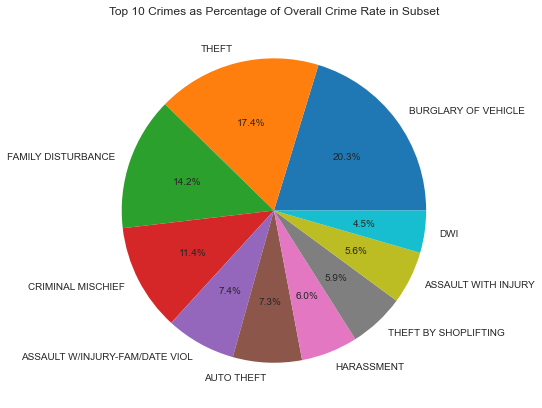

In [8]:
viz1(top_crimes_df)

NameError: name 'clearance_rate' is not defined

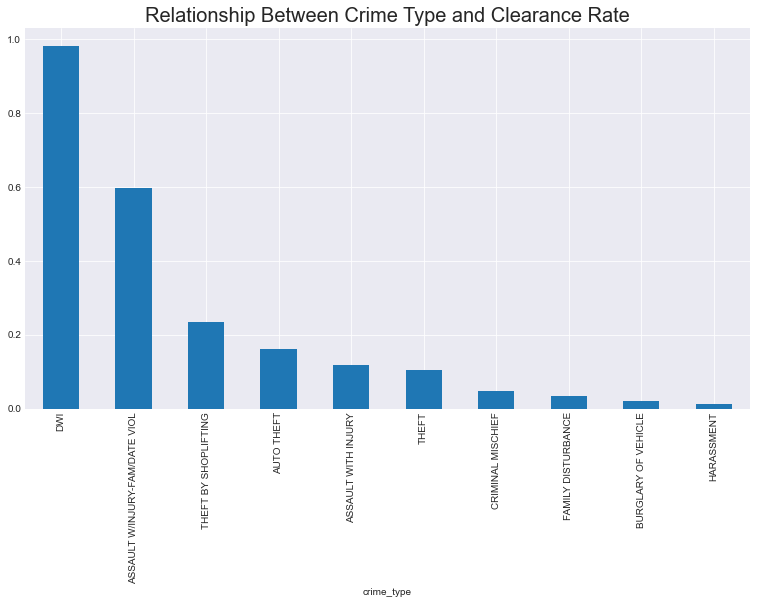

In [9]:
viz2(top_crimes_df)

### Question 2

### Question 3

### Question 4

### Key Takeaways

___

## Modeling



___

## Key Takeaways and Recommendations



___

## Next Steps